<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Processing-and-Feature-Engineering" data-toc-modified-id="Data-Processing-and-Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Processing and Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Date-time-features" data-toc-modified-id="Date-time-features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Date time features</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Boolean-data-types" data-toc-modified-id="Boolean-data-types-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Boolean data types</a></span></li><li><span><a href="#Numerical-features-binning" data-toc-modified-id="Numerical-features-binning-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Numerical features binning</a></span></li><li><span><a href="#Create-dummy-variables-from-object-and-categories" data-toc-modified-id="Create-dummy-variables-from-object-and-categories-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Create dummy variables from object and categories</a></span></li></ul></li><li><span><a href="#Log-transformation-of-large-numerical-values" data-toc-modified-id="Log-transformation-of-large-numerical-values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Log transformation of large numerical values</a></span></li><li><span><a href="#Drop-unwanted-columns" data-toc-modified-id="Drop-unwanted-columns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Drop unwanted columns</a></span></li><li><span><a href="#Save-clean-data" data-toc-modified-id="Save-clean-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save clean data</a></span></li><li><span><a href="#For-Modelling" data-toc-modified-id="For-Modelling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>For Modelling</a></span></li></ul></div>

# Data Description

This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.

![](../data/raw/data_description.png)

# Imports

In [6]:
# my custom module
import bhishan
import src
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
random_state=100
np.random.seed=random_state
np.random.set_state=random_state

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 100)

import IPython
from IPython.display import display

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.16.4'), ('pandas', '0.25.0'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [8]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Useful Scripts

In [170]:
def show_method_attributes(method, ncols=7):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    x = [i for i in dir(method) if i[0].islower()]
    x = [i for i in x if i not in 'os np pd sys time psycopg2'.split()]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [172]:
def json_dump_tofile(myjson,ofile,sort_keys=False):
    """Write json dictionary to a datafile.
    
    Usage:
    myjson = {'num': 5, my_list = [1,2,'apple']}
    json_dump_tofile(myjson, ofile)
    
    """
    import io
    import json

    with io.open(ofile, 'w', encoding='utf8') as fo:
        json_str = json.dumps(myjson,
                          indent=4,
                          sort_keys=sort_keys,
                          separators=(',', ': '),
                          ensure_ascii=False)
        fo.write(str(json_str))

# Load the data

In [76]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
print(df.shape)
df.head().T

(21613, 21)


,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,2.2e+05,5.4e+05,1.8e+05,6e+05,5.1e+05
bedrooms,3,3,2,4,3
bathrooms,1,2.2,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


# Data Processing and Feature Engineering

In [77]:
from bhishan.util_ds import get_column_descriptions

In [78]:
get_column_descriptions(df)

,column,dtype,nans,nunique,nzeros
0,id,int64,0,21436,0
1,bedrooms,int64,0,13,13
2,sqft_living,int64,0,1038,0
3,sqft_lot,int64,0,9782,0
4,waterfront,int64,0,2,21450
5,view,int64,0,5,19489
6,condition,int64,0,5,0
7,grade,int64,0,12,0
8,sqft_above,int64,0,946,0
9,sqft_basement,int64,0,306,13126


## Date time features

In [79]:
df['date'] = pd.to_datetime(df['date'])
df['date'].head(2)

0   2014-10-13
1   2014-12-09
Name: date, dtype: datetime64[ns]

In [80]:
df['yr_sales'] = df['date'].dt.year
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales
0,7129300520,2014-10-13,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014
1,6414100192,2014-12-09,5.4e+05,3,2.2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-1.2e+02,1690,7639,2014


In [81]:
df['age'] = df['yr_sales'] - df['yr_built']
df[['yr_sales','yr_built','age']].head(2)

,yr_sales,yr_built,age
0,2014,1955,59
1,2014,1951,63


In [82]:
df[df['age'] < 0] # some houses were sold before they are built.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age
1763,1832100030,2014-06-25,6e+05,4,4,3570,8250,2,0,0,3,10,2860,710,2015,0,98040,48,-1.2e+02,2230,10000,2014,-1
2687,3076500830,2014-10-29,3.9e+05,1,1,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,48,-1.2e+02,1440,4800,2014,-1
7526,9520900210,2014-12-31,6.1e+05,5,2.8,2730,6401,2,0,0,3,8,2730,0,2015,0,98072,48,-1.2e+02,2520,6126,2014,-1
8039,1250200495,2014-06-24,4.6e+05,2,1.5,1200,1259,2,0,0,3,8,1000,200,2015,0,98144,48,-1.2e+02,1320,1852,2014,-1
14489,2770601530,2014-08-26,5e+05,2,2.2,1570,1269,2,0,0,3,9,1280,290,2015,0,98199,48,-1.2e+02,1570,6000,2014,-1
17098,9126100346,2014-06-17,3.5e+05,3,2,1380,3600,3,0,0,3,8,1380,0,2015,0,98122,48,-1.2e+02,1480,3600,2014,-1
19805,9126100765,2014-08-01,4.6e+05,3,1.8,1320,1014,3,0,0,3,9,1320,0,2015,0,98122,48,-1.2e+02,1380,1495,2014,-1
20770,9310300160,2014-08-28,3.6e+05,5,2.5,2990,9240,2,0,0,3,8,2990,0,2015,0,98133,48,-1.2e+02,1970,18110,2014,-1
20852,1257201420,2014-07-09,6e+05,4,3.2,3730,4560,2,0,0,3,9,2760,970,2015,0,98103,48,-1.2e+02,1800,4560,2014,-1
20963,6058600220,2014-07-31,2.3e+05,3,1.5,1040,1264,2,0,0,3,9,900,140,2015,0,98144,48,-1.2e+02,1350,3000,2014,-1


In [83]:
df['yr_renovated2'] = np.where(df['yr_renovated'].eq(0), df['yr_built'], df['yr_renovated'])
df.filter(regex='yr',axis=1).head(2)

,yr_built,yr_renovated,yr_sales,yr_renovated2
0,1955,0,2014,1955
1,1951,1991,2014,1991


In [84]:
df.filter(regex='yr_*',axis=1).loc[lambda x: x['yr_renovated'] !=0].head(2)

,yr_built,yr_renovated,yr_sales,yr_renovated2
1,1951,1991,2014,1991
35,1930,2002,2014,2002


In [85]:
df['age_after_renovation'] = df['yr_sales'] - df['yr_renovated2']
df.filter(regex='yr|age',axis=1).head(2)

,yr_built,yr_renovated,yr_sales,age,yr_renovated2,age_after_renovation
0,1955,0,2014,59,1955,59
1,1951,1991,2014,63,1991,23


In [86]:
df.filter(regex='yr|age',axis=1).loc[lambda x: x['yr_renovated'] !=0].head(2)

,yr_built,yr_renovated,yr_sales,age,yr_renovated2,age_after_renovation
1,1951,1991,2014,63,1991,23
35,1930,2002,2014,84,2002,12


## Categorical Features
Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

- Some categorical features may be number type, make them string type.
- Some categorical features may be nans make them 'Missing'
- We can fill categorical features by mode.

In [87]:
df.head(1).append(df.dtypes,ignore_index=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation
0,7129300520,2014-10-13 00:00:00,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014,59,1955,59
1,int64,datetime64[ns],float64,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64


In [88]:
cols_str = ['waterfront', 'view', 'condition', 'grade','zipcode']
for c in cols_str:
    df[c] = df[c].astype(str)

In [89]:
cols_obj = df.select_dtypes(['object','category']).columns
cols_obj

Index(['waterfront', 'view', 'condition', 'grade', 'zipcode'], dtype='object')

In [90]:
df.select_dtypes(['object','category']).apply(pd.Series.nunique)

waterfront     2
view           5
condition      5
grade         12
zipcode       70
dtype: int64

In [91]:
cols_obj_small = ['waterfront', 'view', 'condition', 'grade']

for c in cols_obj_small:
    print('\n=========================================')
    print(c) 
    print(df[c].value_counts())


waterfront
0    21450
1      163
Name: waterfront, dtype: int64

view
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


In [92]:
with pd.option_context('display.max_colwidth', 500):
    display(df.select_dtypes(['object','category']).apply(
        lambda x: str(pd.Series.unique(x).tolist()) ).to_frame())

,0
waterfront,"['0', '1']"
view,"['0', '3', '4', '2', '1']"
condition,"['3', '5', '4', '1', '2']"
grade,"['7', '6', '8', '11', '9', '5', '10', '12', '4', '3', '13', '1']"
zipcode,"['98178', '98125', '98028', '98136', '98074', '98053', '98003', '98198', '98146', '98038', '98007', '98115', '98107', '98126', '98019', '98103', '98002', '98133', '98040', '98092', '98030', '98119', '98112', '98052', '98027', '98117', '98058', '98001', '98056', '98166', '98023', '98070', '98148', '98105', '98042', '98008', '98059', '98122', '98144', '98004', '98005', '98034', '98075', '98116', '98010', '98118', '98199', '98032', '98045', '98102', '98077', '98108', '98168', '98177', '98065', ..."


In [93]:
df['zipcode'].value_counts().head()

98103    602
98038    590
98115    583
98052    574
98117    553
Name: zipcode, dtype: int64

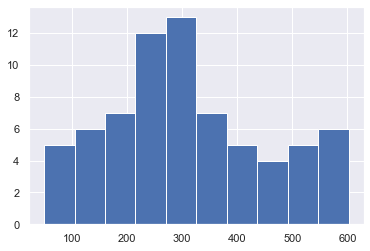

In [94]:
df['zipcode'].value_counts().hist()

In [95]:
# zipcode is related to house price, we may not want to drop it.
# there are 70 unique zipcode values, it will create too many dummies.
# one choice is taking top 5 or top 10 zipcodes 
# we can choose top 10 zipcodes with largest house price.
# (or may be largest number of houses in that zipcode.)

In [96]:
# df[['zipcode','price']].sort_values('price').tail(20)

In [97]:
df[['zipcode','price']].sort_values(['price','zipcode']).drop_duplicates('zipcode',keep='last').tail(10)

,zipcode,price
2864,98144,3.6e+06
6508,98105,3.6e+06
19017,98177,3.8e+06
12370,98006,4.2e+06
2626,98155,4.5e+06
1164,98033,5.1e+06
1315,98040,5.3e+06
9254,98039,6.9e+06
3914,98004,7.1e+06
7252,98102,7.7e+06


In [98]:
most_expensive9_zipcodes = (df[['zipcode','price']]
                           .sort_values(['price','zipcode'])
                           .drop_duplicates('zipcode',keep='last')
                           .tail(9)
                           .zipcode
                           .values
                          )

In [99]:
most_expensive9_zipcodes

array(['98105', '98177', '98006', '98155', '98033', '98040', '98039',
       '98004', '98102'], dtype=object)

In [100]:
# keep same zipcode for top 9 expensive and make all others as others

In [101]:
df['zipcode_top10'] = df['zipcode']
df.loc[~df['zipcode_top10'].isin(most_expensive9_zipcodes), 'zipcode_top10'] = 'others'

In [102]:
# we can also create new feature number of houses in that zipcode
df['zipcode_houses'] = df.groupby(['zipcode'])['price'].transform('count')

In [103]:
df.filter(regex='zip|price',axis=1).drop_duplicates('zipcode_top10')

,price,zipcode,zipcode_top10,zipcode_houses
0,2.2e+05,98178,others,262
21,2e+06,98040,98040,282
54,9.2e+05,98105,98105,229
66,9.8e+05,98004,98004,317
100,8.5e+05,98102,98102,105
120,6.6e+05,98177,98177,255
141,5.3e+05,98006,98006,498
173,9.2e+05,98033,98033,432
194,2.3e+05,98155,98155,446
2974,3e+06,98039,98039,50


In [104]:
cols_obj = df.select_dtypes(['object','category']).columns
cols_obj

Index(['waterfront', 'view', 'condition', 'grade', 'zipcode', 'zipcode_top10'], dtype='object')

In [105]:
# create ordered ordinal labels for categorical data

In [108]:
# waterfron, view, condition, grade are already ordered ordinals

In [109]:
df['zipcode'].nunique()

70

In [110]:
# create new column with rare 1% values named as rare for zipcode

In [111]:
df['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: object

In [143]:
# more frequent than 1%
zipcode_idx_greater_than_1pct = df['zipcode'].value_counts(normalize=True).loc[lambda x: x>0.01].index 
zipcode_idx_greater_than_1pct

# 98045     0.01
# 98002   0.0092  # this index is Rare

Index(['98103', '98038', '98115', '98052', '98117', '98042', '98034', '98118',
       '98023', '98006', '98133', '98059', '98058', '98155', '98074', '98033',
       '98027', '98125', '98056', '98053', '98001', '98075', '98126', '98092',
       '98144', '98106', '98116', '98029', '98199', '98004', '98065', '98122',
       '98146', '98028', '98008', '98040', '98003', '98198', '98031', '98072',
       '98168', '98112', '98055', '98107', '98136', '98178', '98030', '98177',
       '98166', '98022', '98105', '98045'],
      dtype='object')

In [165]:
df['zipcode_with_1pct_rare'] = np.where(df['zipcode'].isin(zipcode_idx_greater_than_1pct),
                                  df['zipcode'], 'Rare')

print(df['zipcode_with_1pct_rare'].nunique())
df['zipcode_with_1pct_rare'].unique()

53


array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', 'Rare', '98115', '98107', '98126',
       '98103', '98133', '98040', '98092', '98030', '98112', '98052',
       '98027', '98117', '98058', '98001', '98056', '98166', '98023',
       '98105', '98042', '98008', '98059', '98122', '98144', '98004',
       '98034', '98075', '98116', '98118', '98199', '98045', '98168',
       '98177', '98065', '98029', '98006', '98022', '98033', '98155',
       '98031', '98106', '98072', '98055'], dtype=object)

In [188]:
var = 'zipcode_with_1pct_rare'
target = 'price'

zipcode_ordered_labels = df[[var,target]].groupby([var])[target].mean().sort_values().index
zipcode_ordinal_labels_dict = {k:i for i, k in enumerate(zipcode_ordered_labels, 0)} 

zipcode_ordinal_labels_dict

{'98168': 0,
 '98001': 1,
 '98023': 2,
 '98003': 3,
 '98030': 4,
 '98031': 5,
 '98198': 6,
 '98055': 7,
 '98178': 8,
 '98042': 9,
 '98022': 10,
 '98106': 11,
 '98092': 12,
 '98058': 13,
 '98146': 14,
 '98038': 15,
 '98133': 16,
 '98118': 17,
 '98056': 18,
 '98155': 19,
 '98126': 20,
 '98045': 21,
 '98028': 22,
 '98166': 23,
 '98125': 24,
 '98059': 25,
 '98034': 26,
 '98065': 27,
 '98136': 28,
 'Rare': 29,
 '98072': 30,
 '98117': 31,
 '98107': 32,
 '98103': 33,
 '98144': 34,
 '98029': 35,
 '98027': 36,
 '98116': 37,
 '98115': 38,
 '98122': 39,
 '98052': 40,
 '98008': 41,
 '98177': 42,
 '98053': 43,
 '98074': 44,
 '98075': 45,
 '98199': 46,
 '98033': 47,
 '98006': 48,
 '98105': 49,
 '98112': 50,
 '98040': 51,
 '98004': 52}

In [174]:
myjson = {'zipcode_ordinal_labels_dict': zipcode_ordinal_labels_dict}
ofile = '../models/zipcode_ordinal_labels_dict.json'
json_dump_tofile(myjson,ofile,sort_keys=False)

In [168]:
df['zipcode_with_1pct_rare_ordinal'] = df['zipcode_with_1pct_rare'].map(zipcode_ordinal_labels_dict)
df.filter(regex='price|zipcode').head()

,price,zipcode,zipcode_top10,zipcode_houses,zipcode_with_rare,zipcode_with_1pct_rare,zipcode_with_1pct_rare_ordinal
0,2.2e+05,98178,others,262,98178,98178,8
1,5.4e+05,98125,others,410,98125,98125,24
2,1.8e+05,98028,others,283,98028,98028,22
3,6e+05,98136,others,263,98136,98136,28
4,5.1e+05,98074,others,441,98074,98074,44


In [214]:
(df[[var,target]]
 .groupby(var)
 .agg({target: np.mean})
 .sort_values(target)
 .index
 .to_frame()
 .assign(rank= lambda dx: range(len(dx)))
 .to_dict()
 ['rank']
)

{'98168': 0,
 '98001': 1,
 '98023': 2,
 '98003': 3,
 '98030': 4,
 '98031': 5,
 '98198': 6,
 '98055': 7,
 '98178': 8,
 '98042': 9,
 '98022': 10,
 '98106': 11,
 '98092': 12,
 '98058': 13,
 '98146': 14,
 '98038': 15,
 '98133': 16,
 '98118': 17,
 '98056': 18,
 '98155': 19,
 '98126': 20,
 '98045': 21,
 '98028': 22,
 '98166': 23,
 '98125': 24,
 '98059': 25,
 '98034': 26,
 '98065': 27,
 '98136': 28,
 'Rare': 29,
 '98072': 30,
 '98117': 31,
 '98107': 32,
 '98103': 33,
 '98144': 34,
 '98029': 35,
 '98027': 36,
 '98116': 37,
 '98115': 38,
 '98122': 39,
 '98052': 40,
 '98008': 41,
 '98177': 42,
 '98053': 43,
 '98074': 44,
 '98075': 45,
 '98199': 46,
 '98033': 47,
 '98006': 48,
 '98105': 49,
 '98112': 50,
 '98040': 51,
 '98004': 52}

## Boolean data types

In [37]:
df.head(1).append(df.dtypes,ignore_index=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses
0,7129300520,2014-10-13 00:00:00,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014,59,1955,59,others,262
1,int64,datetime64[ns],float64,int64,float64,int64,int64,float64,object,object,object,object,int64,int64,int64,int64,object,float64,float64,int64,int64,int64,int64,int64,int64,object,int64


In [38]:
df['sqft_basement'].value_counts().nlargest(5)

0      13126
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

In [39]:
# there are so many zeros, we can create boolean column
# Note that there should not be nans here.
df['basement_bool'] = df['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
df['renovation_bool'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

df.filter(regex='base|reno',axis=1).head()

,sqft_basement,yr_renovated,yr_renovated2,age_after_renovation,basement_bool,renovation_bool
0,0,0,1955,59,0,0
1,400,1991,1991,23,1,1
2,0,0,1933,82,0,0
3,910,0,1965,49,1,0
4,0,0,1987,28,0,0


## Numerical features binning

In [40]:
df.select_dtypes('number').head().T

,0,1,2,3,4
id,7.1e+09,6.4e+09,5.6e+09,2.5e+09,2e+09
price,2.2e+05,5.4e+05,1.8e+05,6e+05,5.1e+05
bedrooms,3,3,2,4,3
bathrooms,1,2.2,1,3,2
sqft_living,1.2e+03,2.6e+03,7.7e+02,2e+03,1.7e+03
sqft_lot,5.6e+03,7.2e+03,1e+04,5e+03,8.1e+03
floors,1,2,1,1,1
sqft_above,1.2e+03,2.2e+03,7.7e+02,1.0e+03,1.7e+03
sqft_basement,0,4e+02,0,9.1e+02,0
yr_built,2e+03,2e+03,1.9e+03,2e+03,2e+03


In [41]:
df.head(1).append(df.dtypes,ignore_index=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool
0,7129300520,2014-10-13 00:00:00,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014,59,1955,59,others,262,0,0
1,int64,datetime64[ns],float64,int64,float64,int64,int64,float64,object,object,object,object,int64,int64,int64,int64,object,float64,float64,int64,int64,int64,int64,int64,int64,object,int64,int64,int64


In [42]:
cols_bin = ['age','age_after_renovation']

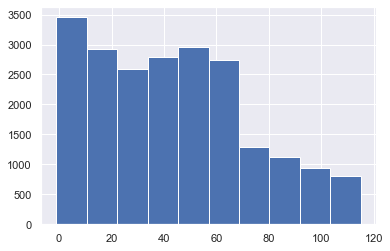

In [43]:
df['age'].hist()

In [44]:
df['age'].describe()

count   2.2e+04
mean         43
std          29
min          -1
25%          18
50%          40
75%          63
max     1.2e+02
Name: age, dtype: float64

In [45]:
df['age_cat'] = pd.cut(df['age'], 10, labels=range(10)).astype(str)
df['age_after_renovation_cat'] = pd.cut(df['age_after_renovation'], 10, labels=range(10))

## Create dummy variables from object and categories

In [46]:
cols_obj_cat = df.select_dtypes(include=[np.object, 'category']).columns
cols_obj_cat

Index(['waterfront', 'view', 'condition', 'grade', 'zipcode', 'zipcode_top10',
       'age_cat', 'age_after_renovation_cat'],
      dtype='object')

In [47]:
df.select_dtypes(include=['object','category']).head()

,waterfront,view,condition,grade,zipcode,zipcode_top10,age_cat,age_after_renovation_cat
0,0,0,3,7,98178,others,5,5
1,0,0,3,7,98125,others,5,2
2,0,0,3,6,98028,others,7,7
3,0,0,5,7,98136,others,4,4
4,0,0,3,8,98074,others,2,2


In [48]:
cols_dummy = ['waterfront', 'view', 'condition', 'grade',  'zipcode_top10',
       'age_cat', 'age_after_renovation_cat']

In [49]:
df_dummy = pd.get_dummies(df[cols_dummy],drop_first=False)

df_dummy.head(2)

,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_10,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,zipcode_top10_98004,zipcode_top10_98006,zipcode_top10_98033,zipcode_top10_98039,zipcode_top10_98040,zipcode_top10_98102,zipcode_top10_98105,zipcode_top10_98155,zipcode_top10_98177,zipcode_top10_others,age_cat_0,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_7,age_cat_8,age_cat_9,age_after_renovation_cat_0,age_after_renovation_cat_1,age_after_renovation_cat_2,age_after_renovation_cat_3,age_after_renovation_cat_4,age_after_renovation_cat_5,age_after_renovation_cat_6,age_after_renovation_cat_7,age_after_renovation_cat_8,age_after_renovation_cat_9
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
print(df.shape)
df.head(2)

(21613, 31)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat
0,7129300520,2014-10-13,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014,59,1955,59,others,262,0,0,5,5
1,6414100192,2014-12-09,5.4e+05,3,2.2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-1.2e+02,1690,7639,2014,63,1991,23,others,410,1,1,5,2


In [51]:
df_encoded = pd.concat([df,df_dummy], axis=1)
print(df.shape)
df.head(2)

(21613, 31)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat
0,7129300520,2014-10-13,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014,59,1955,59,others,262,0,0,5,5
1,6414100192,2014-12-09,5.4e+05,3,2.2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-1.2e+02,1690,7639,2014,63,1991,23,others,410,1,1,5,2


# Log transformation of large numerical values

Log transformations make the features more Gaussian-like and linear models may give 
better performance.

> bedrooms, bathrooms, floors, waterfront, view, condition, grade are categorical columns
  but we can also use them as numerical columns to see how to model performs.
 
> lat and long are geo coordinates, they are also categorical and sometimes treated
  as numerical data.
  
> basement = living - above is redundant variable, may be used or not. This is just a 
  choice of feature engineering.
  
> year columns can be converted to age columns and ages can be binned, however, they 
  also can be treated as number and used in the model.
  
> features with large values can be log1p transformed.

In [52]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,age,yr_renovated2,age_after_renovation,zipcode_top10,zipcode_houses,basement_bool,renovation_bool,age_cat,age_after_renovation_cat
0,7129300520,2014-10-13,2.2e+05,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-1.2e+02,1340,5650,2014,59,1955,59,others,262,0,0,5,5
1,6414100192,2014-12-09,5.4e+05,3,2.2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-1.2e+02,1690,7639,2014,63,1991,23,others,410,1,1,5,2
2,5631500400,2015-02-25,1.8e+05,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-1.2e+02,2720,8062,2015,82,1933,82,others,283,0,0,7,7
3,2487200875,2014-12-09,6e+05,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-1.2e+02,1360,5000,2014,49,1965,49,others,263,1,0,4,4
4,1954400510,2015-02-18,5.1e+05,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-1.2e+02,1800,7503,2015,28,1987,28,others,441,0,0,2,2


In [53]:
cols_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
            'sqft_basement', 'sqft_living15', 'sqft_lot15']

for col in cols_log:
    df['log1p_' + col] = np.log1p(df[col])
    df_encoded['log1p_' + col] = np.log1p(df[col])

df.filter(regex='|'.join(cols_log)).head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_above,log1p_sqft_basement,log1p_sqft_living15,log1p_sqft_lot15
0,2.2e+05,1180,5650,1180,0,1340,5650,12,7.1,8.6,7.1,0,7.2,8.6
1,5.4e+05,2570,7242,2170,400,1690,7639,13,7.9,8.9,7.7,6,7.4,8.9
2,1.8e+05,770,10000,770,0,2720,8062,12,6.6,9.2,6.6,0,7.9,9
3,6e+05,1960,5000,1050,910,1360,5000,13,7.6,8.5,7,6.8,7.2,8.5
4,5.1e+05,1680,8080,1680,0,1800,7503,13,7.4,9,7.4,0,7.5,8.9


# Drop unwanted columns

In [54]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age',
       'yr_renovated2', 'age_after_renovation', 'zipcode_top10',
       'zipcode_houses', 'basement_bool', 'renovation_bool', 'age_cat',
       'age_after_renovation_cat', 'log1p_price', 'log1p_sqft_living',
       'log1p_sqft_lot', 'log1p_sqft_above', 'log1p_sqft_basement',
       'log1p_sqft_living15', 'log1p_sqft_lot15'],
      dtype='object')

In [55]:
df.drop('id',inplace=True,axis=1)

# Save clean data

In [56]:
df.isnull().sum().sum()

0

In [57]:
df.shape

(21613, 37)

In [58]:
df_dummy.shape

(21613, 54)

In [59]:
df.to_csv('../data/processed/data_cleaned.csv',index=False,header=True)

In [60]:
df_encoded.to_csv('../data/processed/data_cleaned_encoded.csv',index=False,header=True)

# For Modelling

- We can scale the data.
- We can remove outliers (or data with very few classes)

In [61]:
df_encoded.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sales', 'age',
       'yr_renovated2', 'age_after_renovation', 'zipcode_top10',
       'zipcode_houses', 'basement_bool', 'renovation_bool', 'age_cat',
       'age_after_renovation_cat', 'waterfront_0', 'waterfront_1', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_1', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'zipcode_top10_98004',
       'zipcode_top10_98006', 'zipcode_top10_98033', 'zipcode_top10_98039',
       'zipcode_top10_98040', 'zipcode_top10_98102', 'zipcode_top10_98105',
       'zipcode_top10_98155', 'zipcode_t